In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specifying filepath from the Google drive
file_path = '/content/drive/MyDrive/eDNA/BOLD database/BOLD_Public.19-Apr-2024.tsv'

In [4]:

# Creating an empty list to hold the fields
data = []

# Expected number of fields
e_n_of_f = 56

with open(file_path, 'r') as f:
    for line in f:
        fields = line.strip().split('\t')
        if len(fields) == e_n_of_f:
            data.append(fields)

# Create dataFrame and set the index
df_0 = pd.DataFrame(data)

#df.reset_index()

# Setting the header
df_0.columns = df_0.iloc[0]

# Dropping duplicate header
df_0=df_0.drop(index=0)

# Inspecting the first 5 few rows
df_0.head()


0    processid      sampleid specimenid museumid       fieldid  \
1  AAASF001-17  CBGSFMX-0101    7804897     None  CBGSFMX-0101   
2  AAASF004-17  CBGSFMX-0301    7804900     None  CBGSFMX-0301   
3  AAASF005-17  CBGSFMX-0302    7804901     None  CBGSFMX-0302   
4  AAASF006-17  CBGSFMX-0303    7804902     None  CBGSFMX-0303   
5  AAASF007-17  CBGSFMX-0304    7804903     None  CBGSFMX-0304   

0                                inst       bin_uri         identification  \
1  Universidad Autonoma de Nuevo Leon  BOLD:ADP3520     Lutzomyia cruciata   
2  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   
3  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   
4  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   
5  Universidad Autonoma de Nuevo Leon  BOLD:AAY5017  Lutzomyia longipalpis   

0 funding_src   kingdom  ... species_reference identification_method  \
1        None  Animalia  ...              None         Morphological   
2        None  Animalia  ...              None         Morphological   
3        None  Animalia  ...              None         Morphological   
4        None  Animalia  ...              None         Morphological   
5        None  Animalia  ...              None         Morphological   

0                      recordset_code_arr    gb_acs marker_code  \
1  ['AAASF', 'DS-17IBMWP', 'DS-UNIQUE17']  MK851247      COI-5P   
2                 ['AAASF', 'DS-17IBMWP']  MK851267      COI-5P   
3                               ['AAASF']  MK851266      COI-5P   
4                 ['AAASF', 'DS-17IBMWP']  MK851265      COI-5P   
5                 ['AAASF', 'DS-17IBMWP']  MK851254      COI-5P   

0                                             nucraw  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...   

0                                  sequence_run_site processid_minted_date  \
1  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
2  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
3  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
4  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   
5  Instituto Politecnico Nacional, Centro de Biot...           30-May-2017   

0 sequence_upload_date identification_rank  
1          12-Jun-2017             species  
2          14-Jun-2017             species  
3          14-Jun-2017             species  
4          14-Jun-2017             species  
5          14-Jun-2017             species  

[5 rows x 56 columns]

In [5]:
df_1=df_0.copy()

In [6]:

 # Inspecting the shape of the dataframe
df_1.shape

(108550, 56)

In [7]:
# Inspecting the datatypes of the various features
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 1 to 108550
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   processid                 108550 non-null  object
 1   sampleid                  108550 non-null  object
 2   specimenid                108550 non-null  object
 3   museumid                  108550 non-null  object
 4   fieldid                   108550 non-null  object
 5   inst                      108550 non-null  object
 6   bin_uri                   108550 non-null  object
 7   identification            108550 non-null  object
 8   funding_src               108550 non-null  object
 9   kingdom                   108550 non-null  object
 10  phylum                    108550 non-null  object
 11  class                     108550 non-null  object
 12  order                     108550 non-null  object
 13  family                    108550 non-null  object
 14  subf

In [8]:
df_1.columns.unique()

Index(['processid', 'sampleid', 'specimenid', 'museumid', 'fieldid', 'inst',
       'bin_uri', 'identification', 'funding_src', 'kingdom', 'phylum',
       'class', 'order', 'family', 'subfamily', 'genus', 'species',
       'subspecies', 'identified_by', 'voucher_type', 'collectors',
       'collection_date', 'collection_date_accuracy', 'life_stage', 'sex',
       'reproduction', 'extrainfo', 'notes', 'coord', 'coord_source',
       'coord_accuracy', 'elev', 'depth', 'elev_accuracy', 'depth_accuracy',
       'country', 'province', 'country_iso', 'region', 'sector', 'site',
       'collection_time', 'habitat', 'collection_note', 'associated_taxa',
       'associated_specimen', 'species_reference', 'identification_method',
       'recordset_code_arr', 'gb_acs', 'marker_code', 'nucraw',
       'sequence_run_site', 'processid_minted_date', 'sequence_upload_date',
       'identification_rank'],
      dtype='object', name=0)

In [9]:
len(df_1.columns.unique())

56

In [10]:
df_1['habitat'].unique()

array(['None', '1.1 Boreal Forest', 'Savannah', 'Plankton',
       'Water column', 'pelagic', 'lowland rainforest', 'Mixed Habitat',
       'Riparian Zone', 'Grassland', 'Wetland', 'Lake', 'Creek',
       '1. Forest & Woodland|1.2 Subarctic Forest',
       '1. Forest & Woodland | 1.1 Boreal Forest', 'Mixed habitat',
       'eukrenon, limnokren', 'River Alcantara',
       'River Agri, brige on road SS598',
       'River Proccella, Campofelice di Roccella',
       'River near road Sortino-Lentini',
       'moss on the rocks, near a river', 'River Velino near Cesoni',
       'Rivier Vera, Tempera', 'rocks in the river current',
       'gravel in the river current', 'Elovica River',
       'source of a river', "Devil's Throat Cave, still water body",
       'an isolated still water body', 'interstitial water',
       'a stream in a forest', 'a stream', 'a still water body',
       'S. Tirino, near Capestrano', 'R. Mentaro, near Martirano',
       'R. Alcantara, Gole Alcantara', 'R. Velino 

In [11]:

x=df_1.loc[[1],['species']]
print(x)

0             species
1  Lutzomyia cruciata


In [12]:
y=df_1.loc[[1],['nucraw']]
print(y.to_string())

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              nucraw
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACATCTTTAAGAATTTTAATTCGAGCAGAATTAGGTCACCCCGGTGCTTTAATTGGTGATGATCAAATTTATAATGTTATTGTTACAGCTCATGCATTTGTAATAATTTTTTTTATAGTTATACCTATTATAATTGGAGGATTTGGTAACTGATTAGTTCCTTTAATATTAGGAGCCCCTGATATAGCATTCCCTCGAATAAATAATATAAGATTTTGACTTTTACCCCCCTCTCTTACTCTCCTTCTTACAAGAAGTATAGTTGAAACTGGGGCAGGAACAGGATGAACTG

In [13]:
habitat=df_1['habitat'].unique().copy()
df_habitat=pd.DataFrame(habitat)
df_habitat

0
0                                          None
1                             1.1 Boreal Forest
2                                      Savannah
3                                      Plankton
4                                  Water column
..                                          ...
71                        Poa foliosa (tussock)
72                                Chicken plots
73            4. Native Grassland | 4.1. Tundra
74  4. Native Grassland|4.2 Subarctic Grassland
75               1. Forest|1.2 Subarctic Forest

[76 rows x 1 columns]

Columns to remove:
"sampleid","museumid","fieldid","inst","processid_minted_date","identification_method","identified_by","collectors","collection_date","collection_date_accuracy","collection_time","collection_note","coord_source","extrainfo","notes","voucher_type","associated_specimen","associated_taxa","sequence_upload_date","sequence_run_site","recordset_code_arr","funding_src","species_reference","depth_accuracy","elev_accuracy","coord_accuracy","subspecies","country_iso"



In [14]:
# Looking out for the ID columns
rem_columns = ["sampleid","museumid","fieldid","inst","processid_minted_date","identification_method","identified_by","collectors","collection_date","collection_date_accuracy","collection_time","collection_note","coord_source","extrainfo","notes","voucher_type","associated_specimen","associated_taxa","sequence_upload_date","sequence_run_site","recordset_code_arr","funding_src","species_reference","depth_accuracy","elev_accuracy","coord_accuracy","subspecies","country_iso"]

df_2 = df_1.drop(rem_columns, axis=1)
df_2.shape

(108550, 28)

In [15]:

df_2.head()

0    processid specimenid       bin_uri         identification   kingdom  \
1  AAASF001-17    7804897  BOLD:ADP3520     Lutzomyia cruciata  Animalia   
2  AAASF004-17    7804900  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
3  AAASF005-17    7804901  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
4  AAASF006-17    7804902  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
5  AAASF007-17    7804903  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   

0      phylum    class    order       family      subfamily  ... country  \
1  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
2  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
3  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
4  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   
5  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...  Mexico   

0      province      region sector  site habitat    gb_acs marker_code  \
1  Quintana Roo  Candelaria   None  None    None  MK851247      COI-5P   
2  Quintana Roo      Huayun   None  None    None  MK851267      COI-5P   
3  Quintana Roo      Huayun   None  None    None  MK851266      COI-5P   
4  Quintana Roo      Huayun   None  None    None  MK851265      COI-5P   
5  Quintana Roo      Huayun   None  None    None  MK851254      COI-5P   

0                                             nucraw identification_rank  
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...             species  
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species  

[5 rows x 28 columns]

In [16]:
# Function to convert columns with 'date' or 'time' in their names to datetime
#def convert_to_datetime(df):
#    for i in df.columns:
#        if 'date' in i.lower() or 'time' in i.lower():
#            df[i] = pd.to_datetime(df[i], errors='coerce')
#    return df

In [17]:
import re

In [18]:
#Classify Habitat type

habitat_patterns = {
    r'Forest': 'Forest',
    r'Boreal Forest': 'Forest',
    r'Savannah': 'Grassland',
    r'Grassland': 'Grassland',
    r'Wetland': 'Wetland',
    r'Lake': 'Water Body',
    r'Creek': 'River/Stream',
    r'River': 'River/Stream',
    r'Stream': 'River/Stream',
    r'Plankton': 'Marine',
    r'Water column': 'Marine',
    r'pelagic': 'Marine',
    r'Mixed Habitat': 'Mixed Habitat',
    r'Mixed habitat': 'Mixed Habitat',
    r'Cave': 'Cave',
    r'Shrubland': 'Shrubland',
    r'Tundra': 'Grassland',
    r'None': 'None',
    r'moss': 'Other',
    r'still water body': 'Water Body',
    r'interstitial water': 'Water Body',
    r'surface of a pond': 'Water Body',
    r'lowland rainforest': 'Forest',
    r'moist soil': 'Forest',
    r'Peat': 'Forest',
    r'Leaf Litter': 'Forest',
    r'soil': 'Forest',
    r'Sahalian village': 'Other',
    r'Chicken plots': 'Other',
    r'eukrenon': 'Other'
}

def classify_habitat(habitat):
    for pattern, habitat_type in habitat_patterns.items():
        if re.search(pattern, habitat, re.IGNORECASE):
            return habitat_type
    return 'Unknown'

df_2['habitat_type'] = df_2['habitat'].apply(classify_habitat)
df_2.head()


0    processid specimenid       bin_uri         identification   kingdom  \
1  AAASF001-17    7804897  BOLD:ADP3520     Lutzomyia cruciata  Animalia   
2  AAASF004-17    7804900  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
3  AAASF005-17    7804901  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
4  AAASF006-17    7804902  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
5  AAASF007-17    7804903  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   

0      phylum    class    order       family      subfamily  ...  \
1  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
2  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
3  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
4  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   
5  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   

0      province      region sector  site habitat    gb_acs marker_code  \
1  Quintana Roo  Candelaria   None  None    None  MK851247      COI-5P   
2  Quintana Roo      Huayun   None  None    None  MK851267      COI-5P   
3  Quintana Roo      Huayun   None  None    None  MK851266      COI-5P   
4  Quintana Roo      Huayun   None  None    None  MK851265      COI-5P   
5  Quintana Roo      Huayun   None  None    None  MK851254      COI-5P   

0                                             nucraw identification_rank  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...             species   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   

0 habitat_type  
1         None  
2         None  
3         None  
4         None  
5         None  

[5 rows x 29 columns]

In [19]:
df_2['habitat_type'].unique()

array(['None', 'Forest', 'Grassland', 'Marine', 'Mixed Habitat',
       'Unknown', 'Wetland', 'Water Body', 'River/Stream', 'Other',
       'Cave', 'Shrubland'], dtype=object)

In [20]:
# looking out for missing values
#df.isnull().sum()

In [21]:
#checking none entries
none_counts = df_2.apply(lambda col: col.str.lower().eq('none').sum())
print(none_counts)

0
processid                   0
specimenid                  0
bin_uri                 16626
identification              0
kingdom                     0
phylum                      0
class                     182
order                     901
family                  13097
subfamily               47891
genus                   43637
species                 55719
life_stage              77000
sex                     85764
reproduction            82780
coord                    7164
elev                    57982
depth                  107080
country                   810
province                 6792
region                  46652
sector                  50117
site                    38180
habitat                 70221
gb_acs                  59965
marker_code                 0
nucraw                      0
identification_rank         0
habitat_type            70221
dtype: int64


In [22]:
108550-59965

48585

In [23]:
# dropping columns with missing values over 100,000

#missing_values_count = df.isnull().sum()
#columns_to_drop = missing_values_count[missing_values_count > 100000].index
#df = df.drop(columns=columns_to_drop)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108550 entries, 1 to 108550
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   processid            108550 non-null  object
 1   specimenid           108550 non-null  object
 2   bin_uri              108550 non-null  object
 3   identification       108550 non-null  object
 4   kingdom              108550 non-null  object
 5   phylum               108550 non-null  object
 6   class                108550 non-null  object
 7   order                108550 non-null  object
 8   family               108550 non-null  object
 9   subfamily            108550 non-null  object
 10  genus                108550 non-null  object
 11  species              108550 non-null  object
 12  life_stage           108550 non-null  object
 13  sex                  108550 non-null  object
 14  reproduction         108550 non-null  object
 15  coord                108550 non-nu

In [24]:
df_3=df_2.copy()

In [25]:
#Transforming coordinates into lattitude
df_3['coord'] = df_3['coord'].str.strip('()')
df_3[['Latitude', 'Longitude']] = None
df_3.loc[df_3['coord'] == 'None', ['Latitude', 'Longitude']] = 'None'
mask = df_3['coord'] != 'None'
df_3.loc[mask, ['Latitude', 'Longitude']] = df_3.loc[mask, 'coord'].str.split(',', expand=True)
df_3.loc[mask,['Latitude']] = df_3.loc[mask,['Latitude']].astype(float)
df_3.loc[mask,['Longitude']] = df_3.loc[mask,['Longitude']].astype(float)
df_3.loc[df_3['coord'] == 'None', ['Latitude', 'Longitude']] = 'None'


df_3.drop(columns=['coord'], inplace=True)
df_3.head()


0    processid specimenid       bin_uri         identification   kingdom  \
1  AAASF001-17    7804897  BOLD:ADP3520     Lutzomyia cruciata  Animalia   
2  AAASF004-17    7804900  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
3  AAASF005-17    7804901  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
4  AAASF006-17    7804902  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   
5  AAASF007-17    7804903  BOLD:AAY5017  Lutzomyia longipalpis  Animalia   

0      phylum    class    order       family      subfamily  ... sector  site  \
1  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
2  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
3  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
4  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   
5  Arthropoda  Insecta  Diptera  Psychodidae  Phlebotominae  ...   None  None   

0 habitat    gb_acs marker_code  \
1    None  MK851247      COI-5P   
2    None  MK851267      COI-5P   
3    None  MK851266      COI-5P   
4    None  MK851265      COI-5P   
5    None  MK851254      COI-5P   

0                                             nucraw identification_rank  \
1  AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACA...             species   
2  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
3  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
4  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   
5  GACTTTATATTTTATTTTCGGGGCTTGATCTGGAATAGTAGGGACA...             species   

0 habitat_type Latitude Longitude  
1         None      NaN       NaN  
2         None      NaN       NaN  
3         None      NaN       NaN  
4         None      NaN       NaN  
5         None      NaN       NaN  

[5 rows x 30 columns]

In [26]:
# Function to create the mapping dictionary and encode the DataFrame manually
def manual_encode(df):
    encoders = {}
    for column in df.columns:
        unique_values = df[column].unique()
        encoder = {value: idx for idx, value in enumerate(unique_values)}
        encoders[column] = encoder
        df[column] = df[column].map(encoder)
    return df, encoders

# Encode the DataFrame

encoded_df, encoders = manual_encode(df_3)



In [27]:
#Checking encoder dictionary
first_key = list(encoders.keys())[0]
print(first_key)

processid


In [28]:
# Assuming 'encoders' is the dictionary from the manual_encode function
# Create a list to hold the rows for the new DataFrame
encoder_list = []

# Loop through the encoders dictionary to create rows
for column, mapping in encoders.items():
    for original_value, encoded_value in mapping.items():
        encoder_list.append({'Column': column, 'Original Value': original_value, 'Encoded Value': encoded_value})

# Create a DataFrame from the list
encoders_df = pd.DataFrame(encoder_list)

# Visualize the DataFrame
print(encoders_df.head())  # Display the first few rows of the DataFrame

# Optionally, save the DataFrame to a CSV file for easier inspection
encoders_df.to_csv('encoders_mapping.csv', index=False)

      Column Original Value  Encoded Value
0  processid    AAASF001-17              0
1  processid    AAASF004-17              1
2  processid    AAASF005-17              2
3  processid    AAASF006-17              3
4  processid    AAASF007-17              4


In [29]:
encoders_df.isnull().sum()

Column            0
Original Value    2
Encoded Value     0
dtype: int64

In [30]:
encoders_habitat=encoders_df[encoders_df['Column']=='habitat_type'].copy()
encoders_species=encoders_df[encoders_df['Column']=='species'].copy()
encoders_habitat.head()

Column Original Value  Encoded Value
352523  habitat_type           None              0
352524  habitat_type         Forest              1
352525  habitat_type      Grassland              2
352526  habitat_type         Marine              3
352527  habitat_type  Mixed Habitat              4

In [31]:
#checking encoder dictionary
first_encoded_value=encoders[first_key]
print(first_encoded_value)

{'AAASF001-17': 0, 'AAASF004-17': 1, 'AAASF005-17': 2, 'AAASF006-17': 3, 'AAASF007-17': 4, 'AAASF008-17': 5, 'AAASF009-17': 6, 'AAASF010-17': 7, 'AAASF011-17': 8, 'AAASF012-17': 9, 'AAASF013-17': 10, 'AAASF014-17': 11, 'AAASF015-17': 12, 'AAASF019-17': 13, 'AAASF020-17': 14, 'AAASF021-17': 15, 'AAASF022-17': 16, 'AAASF023-17': 17, 'AAASF024-17': 18, 'AAASF025-17': 19, 'AAASF026-17': 20, 'AAASF027-17': 21, 'AAASF028-17': 22, 'AAASF029-17': 23, 'AAASF030-17': 24, 'AAASF032-17': 25, 'AAASF034-18': 26, 'AAASF035-18': 27, 'AAASF036-18': 28, 'AAASF040-18': 29, 'AAASF041-18': 30, 'AAASF042-18': 31, 'AAASF043-18': 32, 'AAASF044-18': 33, 'AAASF045-18': 34, 'AAASF046-18': 35, 'AAASF047-18': 36, 'AAASF048-18': 37, 'AAASF049-18': 38, 'AAASF050-18': 39, 'AAASF051-18': 40, 'AAASF052-18': 41, 'AAASF053-18': 42, 'AAASF054-18': 43, 'AACTA001-20': 44, 'AACTA002-20': 45, 'AACTA003-20': 46, 'AACTA008-20': 47, 'AACTA009-20': 48, 'AACTA010-20': 49, 'AACTA011-20': 50, 'AACTA012-20': 51, 'AACTA013-20': 52, 'A

In [32]:
encoded_df.head()

0  processid  specimenid  bin_uri  identification  kingdom  phylum  class  \
1          0           0        0               0        0       0      0   
2          1           1        1               1        0       0      0   
3          2           2        1               1        0       0      0   
4          3           3        1               1        0       0      0   
5          4           4        1               1        0       0      0   

0  order  family  subfamily  ...  sector  site  habitat  gb_acs  marker_code  \
1      0       0          0  ...       0     0        0       0            0   
2      0       0          0  ...       0     0        0       1            0   
3      0       0          0  ...       0     0        0       2            0   
4      0       0          0  ...       0     0        0       3            0   
5      0       0          0  ...       0     0        0       4            0   

0  nucraw  identification_rank  habitat_type  Latitude  Longitude  
1       0                    0             0         0          0  
2       1                    0             0         0          0  
3       2                    0             0         0          0  
4       3                    0             0         0          0  
5       4                    0             0         0          0  

[5 rows x 30 columns]

<Axes: xlabel='0', ylabel='0'>

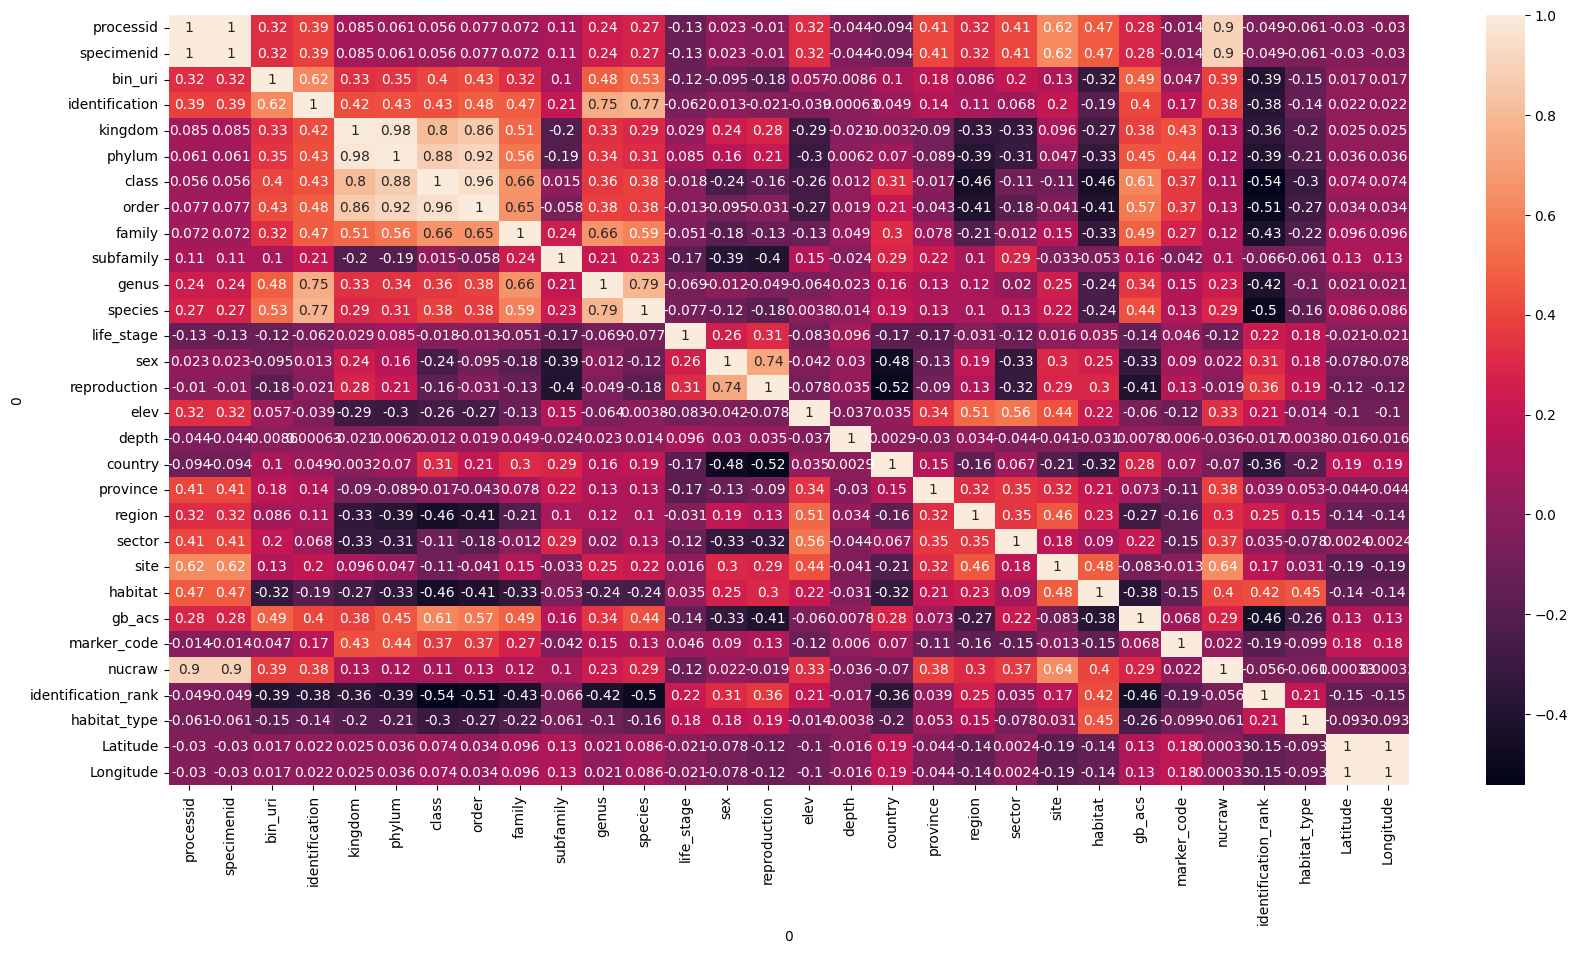

In [33]:
#Correlation of encoded_df
fig = plt.figure(figsize=(20, 10))

sns.heatmap(encoded_df.corr(), annot=True, cbar='coolwarm')

In [34]:
#Selecting few of the columns that are of interest

encoded_dfselected=encoded_df[["processid",'specimenid','bin_uri','identification','kingdom','phylum','species','Latitude','Longitude','elev','depth','habitat','marker_code','nucraw','identification_rank']].copy()


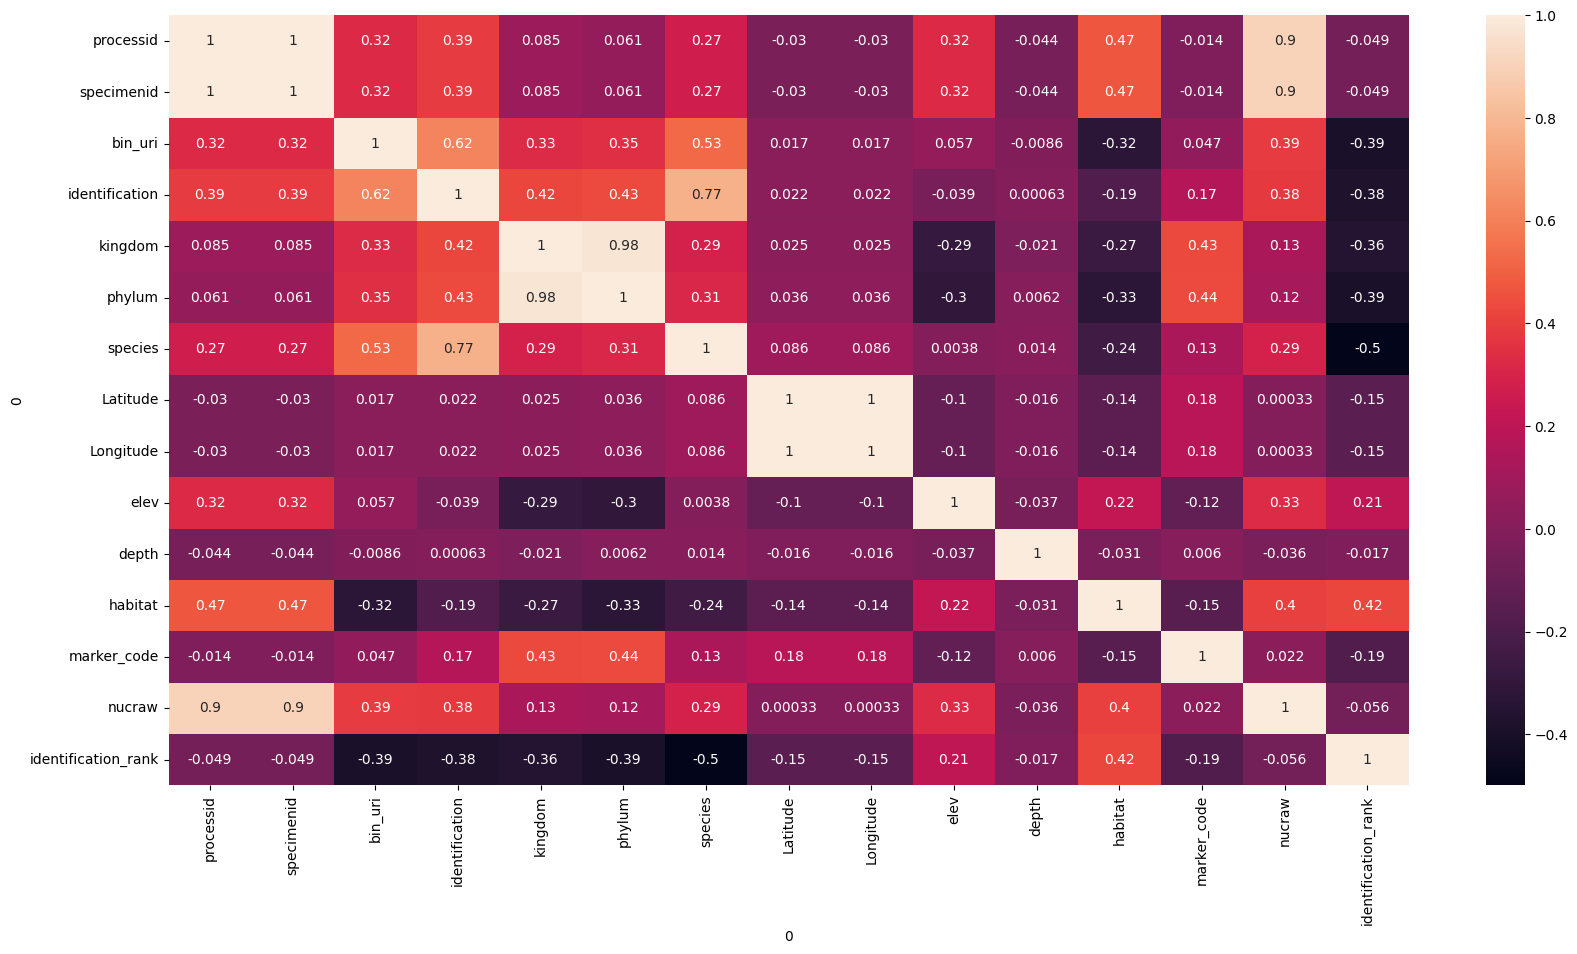

In [35]:
#Checking correlation with selected df
fig = plt.figure(figsize=(20, 10))

sns.heatmap(encoded_dfselected.corr(), annot=True, cbar='coolwarm');

In [36]:
#Feature set of encoded_df
encoded_df_x=encoded_df.drop(columns=['habitat'])

In [37]:
#df_c=df3_encoded[['bin_uri','nucraw']]

In [38]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#NORMALIZING THE DATA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_df_x)



In [ ]:
# Range of clusters to test
cluster_range = range(2, 20)  # Typically, 2 to 10 clusters are tested

from sklearn.metrics import silhouette_score
# Lists to store the results
inertia = []
silhouette_scores = []



# Run KMeans for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method results
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Plot the Silhouette Analysis results
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.show()

# Find the optimal number of clusters based on silhouette scores
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on silhouette scores is: {optimal_clusters}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans19 = KMeans(n_clusters=19, random_state=42)
kmeans19.fit(encoded_df_x)
encoded_df_x['Cluster_19'] = kmeans19.labels_


In [ ]:
kmeans12 = KMeans(n_clusters=12, random_state=42)
kmeans12.fit(encoded_df_x)
encoded_df_x['Cluster_12'] = kmeans12.labels_

In [ ]:
#With cluster 19
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['Cluster_19'], encoded_df_x['nucraw'], c=encoded_df_x['habitat_type'], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Cluster')
plt.ylabel('edna Samples')
plt.colorbar(label='Habitat_type')
plt.show()

In [ ]:
#With cluster 12
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['Cluster_12'], encoded_df_x['nucraw'], c=encoded_df_x['habitat_type'], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Cluster')
plt.ylabel('edna samples')
plt.colorbar(label='Habitat type')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(encoded_df_x)
encoded_df_x['PC1'] = principal_components[:, 0]
encoded_df_x['PC2'] = principal_components[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['PC1'], encoded_df_x['PC2'], c=encoded_df_x['Cluster_19'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(encoded_df_x)
encoded_df_x['PC1'] = principal_components[:, 0]
encoded_df_x['PC2'] = principal_components[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['PC1'], encoded_df_x['PC2'], c=encoded_df_x['Cluster_12'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['species'], encoded_df_x['habitat_type'], c=encoded_df_x['Cluster_12'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Species')
plt.ylabel('habitat_type')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['species'], encoded_df_x['marker_code'], c=encoded_df_x['Cluster_12'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Species')
plt.ylabel('marker_code')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df_x['habitat_type'], encoded_df_x['species'], c=encoded_df_x['Cluster_19'], cmap='viridis')
plt.title('Clusters')
plt.xlabel('Habitat Type')
plt.ylabel('Species')
plt.colorbar(label='Cluster')
plt.xticks(encoders_habitat['Encoded Value'],encoders_habitat['Original Value'],rotation=90)
#plt.yticks(encoders_species['Encoded Value'],encoders_species['Original Value'])
plt.show()

In [ ]:
len(encoded_df_x['species'].unique())

In [ ]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
# Get unique values in 'column1'
unique_species = encoded_df_x['species'].unique() #all values were crashing ram

encoded_df_x_ = encoded_df_x[encoded_df_x['species']!=0]
# Create subplots
num_unique_values = 5#len(unique_values) #5
fig, axs = plt.subplots(num_unique_values, 1, figsize=(8, 10 * num_unique_values))

# Create a colormap
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=encoded_df_x_['Cluster_12'].min(), vmax=encoded_df_x_['Cluster_12'].max())

# If only one subplot, axs will not be a list, so we need to handle that case
if num_unique_values == 1:
    axs = [axs]
random_sample= pd.Series(unique_species).sample(5, random_state=1).tolist()
for i, value in enumerate(random_sample):#enumerate(unique_values):#
    subset_df = encoded_df_x_[encoded_df_x['species'] == value]
    axs[i].scatter(subset_df['habitat_type'], subset_df['nucraw'], c=subset_df['Cluster_12'], cmap='viridis')
    sub_t=encoders_species[encoders_species['Encoded Value']==value]['Original Value'].values[0]
    axs[i].set_title(f'Distribution of {sub_t}')
    axs[i].set_xlabel('Habitat Type')
    axs[i].set_xticks(encoders_habitat['Encoded Value'],encoders_habitat['Original Value'],rotation=30)
    axs[i].set_ylabel('EDNA Sample')



# Add a common colorbar
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Cluster')



plt.show()

In [ ]:
import matplotlib.animation as animation

# Create a figure and axis for the plot
fig, axs = plt.subplots(num_unique_values, 1, figsize=(8, 10 * num_unique_values))

# Create a colormap
cmap = plt.get_cmap('viridis')
norm = Normalize(vmin=encoded_df_x_['Cluster_12'].min(), vmax=encoded_df_x_['Cluster_12'].max())

# Function to update the plot for each frame in the animation
def update(frame):
    axs[0].clear()  # Clear the previous plot
    random_sample = pd.Series(unique_species).sample(5, random_state=frame).tolist()  # Randomly select 5 species
    for i, value in enumerate(random_sample):
        subset_df = encoded_df_x_[encoded_df_x_['species'] == value]
        axs[i].scatter(subset_df['habitat_type'], subset_df['nucraw'], c=subset_df['Cluster_12'], cmap='viridis')
        sub_t = encoders_species[encoders_species['Encoded Value'] == value]['Original Value'].values[0]
        axs[i].set_title(f'Distribution of {sub_t}')
        axs[i].set_xlabel('Habitat Type')
        axs[i].set_xticks(encoders_habitat['Encoded Value'], encoders_habitat['Original Value'], rotation=30)
        axs[i].set_ylabel('EDNA Sample')

    # Add a common colorbar
    cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='vertical', pad=0.02)
    cbar.set_label('Cluster')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=20, repeat=False)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize figure and axes
fig, axs = plt.subplots(1, 1, figsize=(8,  10))

# Initialize lines for each subplot

#l, = axs.scatter(encoded_df_x_['habitat_type'], encoded_df_x_['nucraw'])  # Initialize with some data


# Define update function
def update(frame):
    # Get unique values in 'column1'
    unique_species = encoded_df_x['species'].unique() #all values were crashing ram
    encoded_df_x_ = encoded_df_x[encoded_df_x['species']!=0]
    encoded_df_x_ = encoded_df_x_[encoded_df_x_['habitat_type']!=0]
# Create subplots
    #num_unique_values = 5#len(unique_values) #5
    #fig, axs = plt.subplots(1, 1, figsize=(8, 10 * num_unique_values))

# Create a colormap
    cmap = plt.get_cmap('viridis')
    norm = Normalize(vmin=encoded_df_x_['Cluster_12'].min(), vmax=encoded_df_x_['Cluster_12'].max())

# If only one subplot, axs will not be a list, so we need to handle that case
    random_sample= pd.Series(unique_species).sample(1).tolist()
    subset_df = encoded_df_x_[encoded_df_x_['species'] == random_sample[0]]
    axs.scatter(subset_df['habitat_type'], subset_df['nucraw'], c=subset_df['Cluster_12'], cmap='viridis')
    sub_t=encoders_species[encoders_species['Encoded Value']==value]['Original Value'].values[0]
    axs.set_title(f'Distribution of {sub_t}')
    axs.set_xlabel('Habitat Type')
    axs.set_xticks(encoders_habitat['Encoded Value'],encoders_habitat['Original Value'],rotation=30)
    axs.set_ylabel('EDNA Sample')



# Add a common colorbar
cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Cluster')



# Create animation
ani = animation.FuncAnimation(fig, update, frames=50, repeat=False)

# Save animation as MP4
ani.save('animation3.mp4')

plt.show()


-----------------------------------------------------------------
Here we are starting with DNA alignment and Distance matrix generation.

In [ ]:
#installing biopython
!pip install biopython

In [ ]:
from Bio import Entrez, SeqIO

##Fetching Reference sequence from ncbi sequentially

# email address, which NCBI requires for access
Entrez.email = "medhasharma3250@gmail.com"

def fetch_sequence(accession_number):
    """
    Fetches a nucleotide sequence from GenBank given an accession number.
    """
    try:
        # Fetch the sequence data from NCBI
        handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text")
        record = SeqIO.read(handle, "genbank")
        handle.close()
        return record
    except Exception as e:
        print(f"Error fetching data for {accession_number}: {e}")
        return None

# Example GenBank accession numbers
accession_numbers = df_2['gb_acs'].unique().tolist()

# Dictionary to store fetched sequences
sequences = {}

for acc in accession_numbers:
    record = fetch_sequence(acc)
    if record:
        sequences[acc] = record

# Display the fetched sequences
for acc, record in sequences.items():
    print(f"Accession: {acc}")
    print(f"Description: {record.description}")
    print(f"Sequence: {record.seq}\n")


In [ ]:
len(sequences)

In [ ]:
samp_seq1=df_2.loc[[1],['nucraw']].values
samp_acc=df_2.loc[[1],['gb_acs']].values
ref_seq='AACATTATATTTTATTTTTGGAGCCTGAGCAGGAATAGTGGGAACATCTTTAAGAATTTTAATTCGAGCAGAATTAGGTCACCCCGGTGCTTTAATTGGTGATGATCAAATTTATAATGTTATTGTTACAGCTCATGCATTTGTAATAATTTTTTTTATAGTTATACCTATTATAATTGGAGGATTTGGTAACTGATTAGTTCCTTTAATATTAGGAGCCCCTGATATAGCATTCCCTCGAATAAATAATATAAGATTTTGACTTTTACCCCCCTCTCTTACTCTCCTTCTTACAAGAAGTATAGTTGAAACTGGGGCAGGAACAGGATGAACTGTTTATCCACCTCTTTCAAGAAATATTGCCCATAGAGGAGCTTCTGTTGATTTAGCAATTTTTTCCCTACATTTAGCCGGGATTTCATCTATTCTTGGAGCAGTAAATTTTATTACTACAGTTATTAATATACGATCTGCTGGAATTACATTAGATCGAATACCTTTATTTGTTTGATCTGTAATAATTACTGCGGTACTTCTATTATTATCATTACCTGTTTTAGCAGGTGCAATTACAATACTTCTAACTGATCGTAATCTAAATACTTCTTTTTTTGACCCTGCGGGAGGTGGGGATCCAATTTTATATCAACATTTATTT'
print(samp_acc)


In [ ]:
samp_seq1==ref_seq


In [ ]:
from Bio import Entrez, SeqIO

##Fetching Reference sequence from ncbi using batch

# email address, which NCBI requires for access
Entrez.email = "medhasharma3250@gmail.com"


def fetch_sequences(accession_numbers):
    """
    Fetches nucleotide sequences from GenBank given a list of accession numbers.
    """
    try:
        # Post the list of accession numbers to NCBI
        search_results = Entrez.epost(db="nucleotide", id=",".join(accession_numbers))
        search_results_content = search_results.read().decode("utf-8")
        webenv = search_results_content.split("<WebEnv>")[1].split("</WebEnv>")[0]
        query_key = search_results_content.split("<QueryKey>")[1].split("</QueryKey>")[0]

        # Fetch the sequence data from NCBI
        handle = Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", webenv=webenv, query_key=query_key)
        records = list(SeqIO.parse(handle, "genbank"))
        handle.close()

        return records
    except Exception as e:
        print(f"Error fetching data for accession numbers: {e}")
        return []


# Example GenBank accession numbers
accession_numbers = df_2['gb_acs'].unique().tolist() # Replace with valid accession numbers

# Fetch the sequences in batch
sequences = fetch_sequences(accession_numbers)

# Dictionary to store fetched sequences
sequences_dict = {record.id: record for record in sequences}

# Display the fetched sequences
'''
for acc, record in sequences_dict.items():
    print(f"Accession: {acc}")
    print(f"Description: {record.description}")
    print(f"Sequence: {record.seq}\n")
'''


In [ ]:
len(sequences_dict)

In [ ]:
len(accession_numbers)

In [ ]:
sequences_dict.keys()

In [ ]:
accession_numbers

In [ ]:
samp_seq1df=df_2[df_2['gb_acs']=='MK851247'].copy()
samp_seq1df[['processid','marker_code','species','gb_acs','habitat_type','nucraw']]

In [ ]:
accession_numbers = df_3['gb_acs'].unique().tolist()

In [ ]:
samp_seq2df=df_2[df_2['species']=='Lutzomyia cruciata']
samp_seq2df[['processid','marker_code','species','gb_acs','habitat_type','nucraw']]

In [ ]:
grouped_df=df_2.groupby(['species', 'processid', 'marker_code','nucraw','habitat_type'])
grouped_df.head()

In [ ]:
grouped_df[['species', 'processid', 'marker_code','nucraw','habitat_type']].head()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_c['bin_uri'], df_c['species'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('bin_uri')
plt.ylabel('species')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_c['nucraw'], df_c['kingdom'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('edna')
plt.ylabel('kingdom')
plt.colorbar(label='Cluster')
plt.show()

Extra_experiments---

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_c['nucraw'], df_c['phylum'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('edna')
plt.ylabel('phylum')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
value=0
x=encoders_species[encoders_species['Encoded Value']==value]['Original Value']
x.values[0]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_c)
kmeans = KMeans(n_clusters=76, random_state=42)
kmeans.fit(scaled_features)
df_c['Cluster'] = kmeans.labels_
print(df_c)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_c['PC1'] = principal_components[:, 0]
df_c['PC2'] = principal_components[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(df_c['PC1'], df_c['PC2'], c=df_c['Cluster'], cmap='viridis')
plt.title('Clusters of Habitat')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
df2=pd.DataFrame({"AB": ["(19.3786,-88.1892)","(19.5855,-88.5843)","(19.5855,-88.5843)","(19.5855,-88.5843)","(19.5855,-88.5843)"]})
df2['AB'] = df2['AB'].str.strip('()')
df2[['Latitude', 'Longitude']] = df2['AB'].str.split(',', expand=True)
df2['Latitude'] = df2['Latitude'].astype(float)
df2['Longitude'] = df2['Longitude'].astype(float)
df2.drop(columns=['AB'], inplace=True)
df2.head()

In [ ]:

# Sample DataFrame
df2 = pd.DataFrame({"coord": ["none", "(19.3786,-88.1892)", "none", "(19.5855,-88.5843)", "none"]})

# Remove parentheses and split the column into two new columns, handling 'none' case
df2['coord'] = df2['coord'].str.strip('()')

# Create Latitude and Longitude columns initialized with None
df2[['Latitude', 'Longitude']] = None

# Update Latitude and Longitude for non-'none' values
mask = df2['coord'] != 'none'
df2.loc[mask, ['Latitude', 'Longitude']] = df2.loc[mask, 'coord'].str.split(',', expand=True)

# If coord is 'none', Latitude and Longitude should be 'None'
df2.loc[df2['coord'] == 'none', ['Latitude', 'Longitude']] = 'None'

print(df2)


In [ ]:
habitat=df3['habitat'].unique().copy()

In [ ]:
len(habitat)

In [ ]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()
df2_encoded=df2.copy()
# Loop through each column and apply LabelEncoder if the column is of object type (categorical)
for column in df2.columns:
    if df2[column].dtype == 'object':
        df2_encoded[column] = label_encoder.fit_transform(df2[column])

print("DataFrame before label encoding:")
print(df2)

print("DataFrame after label encoding:")
print(df2_encoded)